![image.png](../background_photos/libs_04_karmirkar.jpg)
Կարմիրքար (Մեծն Փառախադեմ) [լուսանկարի հղումը](https://unsplash.com/photos/-sq0aMTHHZY), Հեղինակ՝ [Zvart Baghdasaryan](https://unsplash.com/@zvart)

<a href="ToDo" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> (ToDo)

# 📌 Նկարագիր

[📚 Ամբողջական նյութը](04_pandas_2.ipynb)
ToDo

#### 📺 Տեսանյութեր


#### 🏡 Տնային


# 📚 Նյութը
1. [Docs](https://pandas.pydata.org/docs)
2. [Youtube video](https://www.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS)
3. [Kaggle mini course](https://www.kaggle.com/learn/pandas)

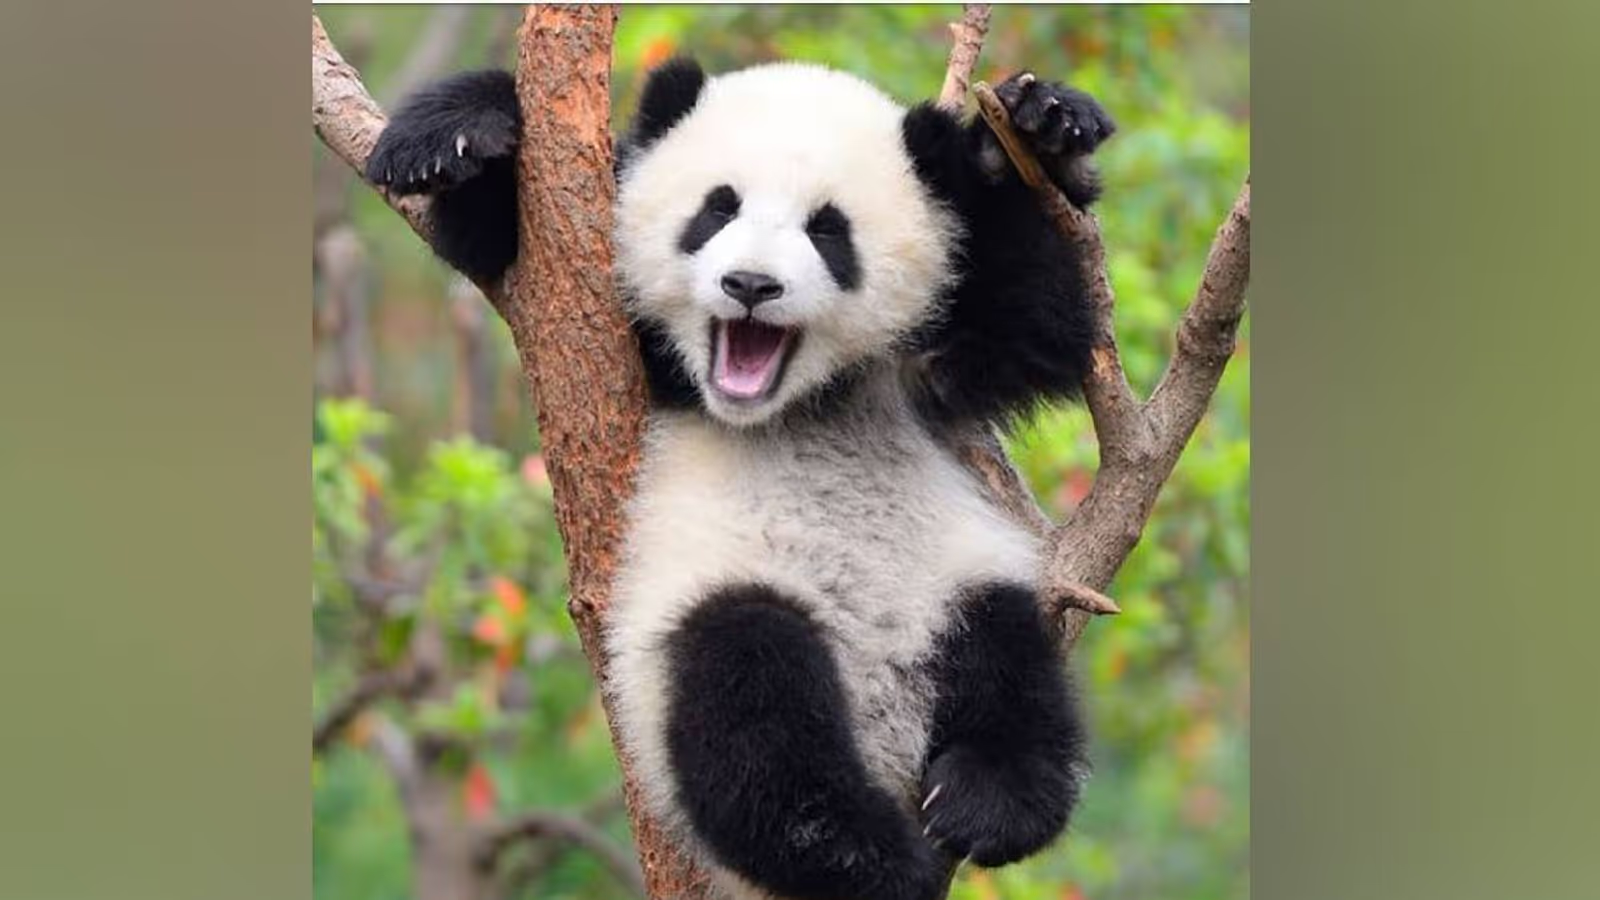

## Joining dfs

### Concat

In [2]:
import pandas as pd

df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

df2 = pd.DataFrame({
    'ID': [4, 5, 6],
    'Name': ['David', 'Eve', 'Frank'],
    'Age': [40, 50, 60]
})

print(df1)
print()
print(df2)

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35

   ID   Name  Age
0   4  David   40
1   5    Eve   50
2   6  Frank   60


In [9]:
# Concatenating vertically (default axis=0)
result = pd.concat([df1, df2])
result

ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
0   4    David   40
1   5      Eve   50
2   6    Frank   60

In [8]:
result.reset_index(drop=True)

ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   70000

In [10]:
df3 = pd.DataFrame({
    'Salary': [50000, 60000, 70000]
})
print(df3)



   Salary
0   50000
1   60000
2   70000


In [11]:
# Concatenating horizontally
result = pd.concat([df1, df3], axis=1)
result

ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   70000

In [12]:
df4 = pd.DataFrame({
    'ID': [7, 8],
    'Salary': [55000, 75000]
})

# Concatenating with missing columns
print(df1)
print(df4)

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
   ID  Salary
0   7   55000
1   8   75000


In [16]:
result = pd.concat([df1, df4], axis=0)
print(result)

   ID     Name   Age   Salary
0   1    Alice  25.0      NaN
1   2      Bob  30.0      NaN
2   3  Charlie  35.0      NaN
0   7      NaN   NaN  55000.0
1   8      NaN   NaN  75000.0


In [21]:
import numpy as np

In [20]:
assert np.all(result.isna()), "Օ ոչ"

AssertionError: Օ ոչ

### Concatenating with keys (multi-index)

In [24]:
print(df1)
print()
print(df2)

result = pd.concat([df1, df2], keys=['Group 1', 'Group 2'], axis=0)
print(result)

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35

   ID   Name  Age
0   4  David   40
1   5    Eve   50
2   6  Frank   60
           ID     Name  Age
Group 1 0   1    Alice   25
        1   2      Bob   30
        2   3  Charlie   35
Group 2 0   4    David   40
        1   5      Eve   50
        2   6    Frank   60


### Merge

In [25]:
df5 = pd.DataFrame({
    'ID': [1, 2],
    'Department': ['HR', 'IT']
})

print(df1)
print(df5)

# Merging DataFrames on 'ID' column
result = pd.merge(df1, df5, on='ID')
result

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
   ID Department
0   1         HR
1   2         IT


ID   Name  Age Department
0   1  Alice   25         HR
1   2    Bob   30         IT

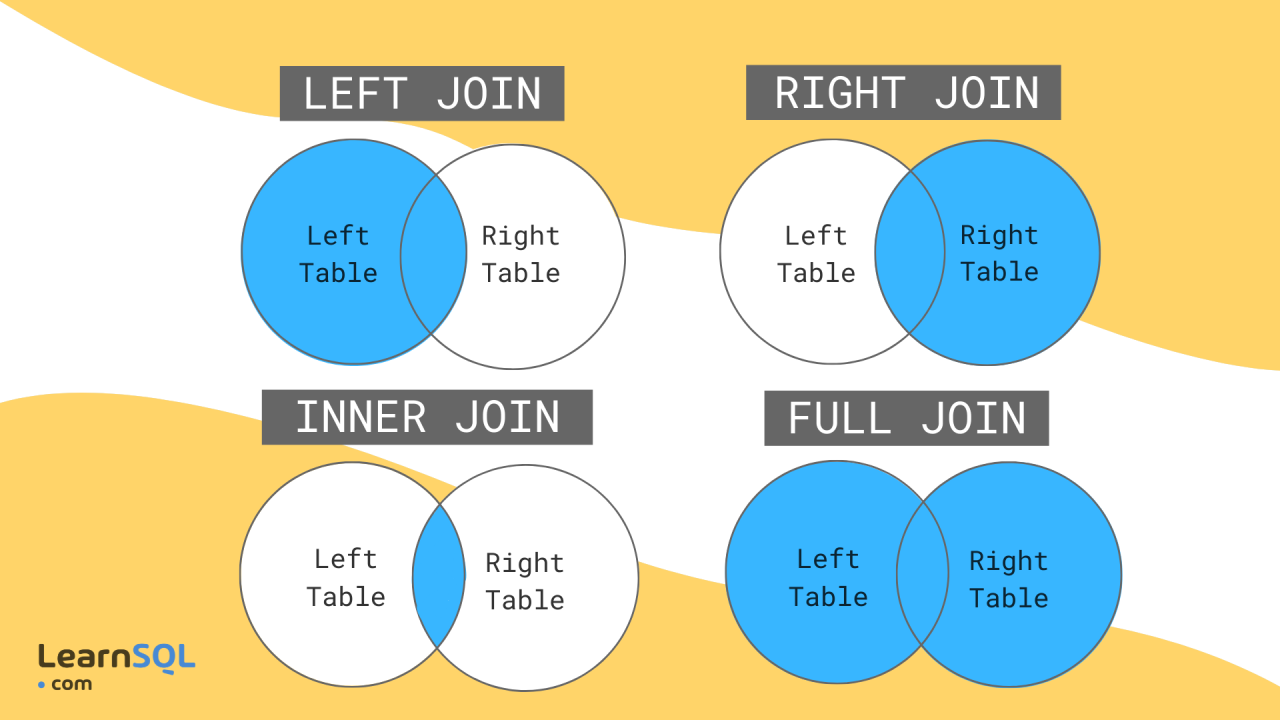

In [ ]:
pd.merge(թրաշ, գլխի մազեր)

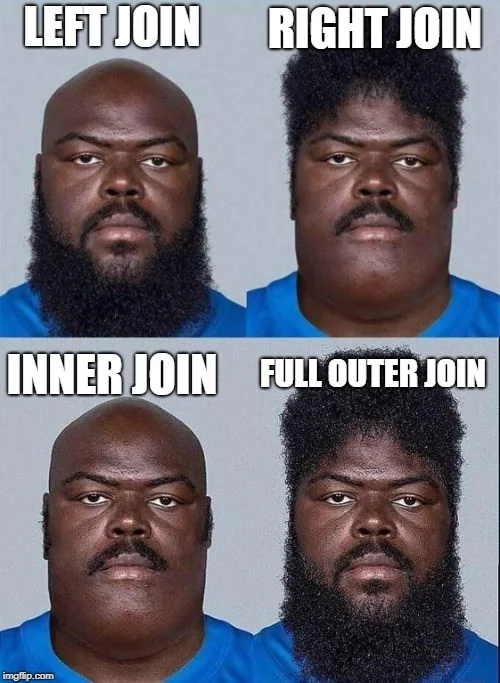

In [26]:
# DataFrame 1
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40]
})

# DataFrame 2
df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Department': ['HR', 'Finance', 'IT', 'Marketing'],
    'Salary': [50000, 60000, 70000, 80000]
})

print("DataFrame 1:\n", df1)
print("DataFrame 2:\n", df2)

DataFrame 1:
    ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
DataFrame 2:
    ID Department  Salary
0   3         HR   50000
1   4    Finance   60000
2   5         IT   70000
3   6  Marketing   80000


In [27]:
result_inner = pd.merge(df1, df2, on='ID', how='inner')
print("Inner Join Result:\n", result_inner)

Inner Join Result:
    ID     Name  Age Department  Salary
0   3  Charlie   35         HR   50000
1   4    David   40    Finance   60000


In [28]:
result_outer = pd.merge(df1, df2, on='ID', how='outer')
print("Outer Join Result:\n", result_outer)

Outer Join Result:
    ID     Name   Age Department   Salary
0   1    Alice  25.0        NaN      NaN
1   2      Bob  30.0        NaN      NaN
2   3  Charlie  35.0         HR  50000.0
3   4    David  40.0    Finance  60000.0
4   5      NaN   NaN         IT  70000.0
5   6      NaN   NaN  Marketing  80000.0


In [29]:
result_left = pd.merge(df1, df2, on='ID', how='left')
print("Left Join Result:\n", result_left)

Left Join Result:
    ID     Name  Age Department   Salary
0   1    Alice   25        NaN      NaN
1   2      Bob   30        NaN      NaN
2   3  Charlie   35         HR  50000.0
3   4    David   40    Finance  60000.0


In [30]:
result_right = pd.merge(df1, df2, on='ID', how='right')
print("Right Join Result:\n", result_right)

Right Join Result:
    ID     Name   Age Department  Salary
0   3  Charlie  35.0         HR   50000
1   4    David  40.0    Finance   60000
2   5      NaN   NaN         IT   70000
3   6      NaN   NaN  Marketing   80000


#### Suffixes

In [ ]:
df7 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [28, 35, 38]
})

print(df1)
print(df7)
# Merging with suffixes for overlapping columns
result = pd.merge(df1, df7, on='ID', suffixes=('_left', '_right'))
result

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
   ID     Name  Age
0   1    Alice   28
1   2      Bob   35
2   3  Charlie   38


ID Name_left  Age_left Name_right  Age_right
0   1     Alice        25      Alice         28
1   2       Bob        30        Bob         35
2   3   Charlie        35    Charlie         38

### Join

In [31]:
df8 = pd.DataFrame({
    'Salary': [50000, 60000, 70000]
}, index=[1, 2, 3])

# Joining DataFrames on index
print(df1)
print(df8)

result = df1.join(df8)
print(result)


   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
   Salary
1   50000
2   60000
3   70000
   ID     Name  Age   Salary
0   1    Alice   25      NaN
1   2      Bob   30  50000.0
2   3  Charlie   35  60000.0
3   4    David   40  70000.0


In [32]:
# Inner join (only matching indices)
result = df1.join(df8, how='inner')
print(result)

# Outer join (all rows, NaNs for non-matches)
result = df1.join(df8, how='outer')
print(result)

   ID     Name  Age  Salary
1   2      Bob   30   50000
2   3  Charlie   35   60000
3   4    David   40   70000
   ID     Name  Age   Salary
0   1    Alice   25      NaN
1   2      Bob   30  50000.0
2   3  Charlie   35  60000.0
3   4    David   40  70000.0


### Append - Հնացած ա, նույնն ա ինչ ուղղակի տողերի concat-ը

In [33]:
result = df1.append(df2)
print(result)

result = pd.concat([df1, df2], axis=0)
print(result)

AttributeError: 'DataFrame' object has no attribute 'append'

### Երբ որը օգտագործել

- `concat()` - հասարակ տողեր/սյուներ ավելանցելու համար \
- `merge()` - ըստ ընդհանուր սյուների միավորումներ անելու համար \
- `join()` - ինդեքսով միավորելու, կամ merge գրել ալարելու դեպքում \

Միշտ հիշեք ստուգել `NA`-ներ առաջացել են թե չէ միավորումից հետո

## Excel

In [ ]:
!pip install openpyxl

Արհեստական տվյալների ստեղծում

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create a date range for one year of trading data (252 days)
date_range = pd.date_range(end=datetime.today(), periods=252, freq='B')

# Generate synthetic stock data for two different stocks
stock1 = pd.DataFrame({
    'date': date_range,
    'price': (np.random.rand(252) + 0.5).cumprod() * 100,
    'volume': np.random.randint(1000, 10000, 252)
}).set_index('date')

stock2 = pd.DataFrame({
    'date': date_range,
    'price': (np.random.rand(252) + 0.5).cumprod() * 200,
    'volume': np.random.randint(1000, 10000, 252)
}).set_index('date')

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('financial_data.xlsx', engine='openpyxl') as writer:
    # Write each DataFrame to a different worksheet
    stock1.to_excel(writer, sheet_name='Stock1')
    stock2.to_excel(writer, sheet_name='Stock2')


### Reading Excel files

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [ ]:
df = pd.read_excel('financial_data.xlsx') # կարդումա առաջին sheetը
df

date       price  volume
0   2023-09-18 07:15:07.581  149.566928    4534
1   2023-09-19 07:15:07.581  182.141067    4758
2   2023-09-20 07:15:07.581  110.614319    7274
3   2023-09-21 07:15:07.581  142.842656    4369
4   2023-09-22 07:15:07.581   73.335239    6454
..                      ...         ...     ...
247 2024-08-28 07:15:07.581    0.000005    1423
248 2024-08-29 07:15:07.581    0.000004    9728
249 2024-08-30 07:15:07.581    0.000002    5640
250 2024-09-02 07:15:07.581    0.000001    1220
251 2024-09-03 07:15:07.581    0.000001    6300

[252 rows x 3 columns]

In [35]:
# Reading a specific sheet by its name
df = pd.read_excel('financial_data.xlsx', sheet_name='Stock2')
print(df.head())
# Reading a specific sheet by its index
df = pd.read_excel('financial_data.xlsx', sheet_name=1)
print(df.head())

                     date       price  volume
0 2024-07-19 20:30:03.855  130.728012    4713
1 2024-07-22 20:30:03.855  177.801505    5810
2 2024-07-23 20:30:03.855  133.803179    7428
3 2024-07-24 20:30:03.855  196.716370    5407
4 2024-07-25 20:30:03.855  167.800902    4481
                     date       price  volume
0 2024-07-19 20:30:03.855  130.728012    4713
1 2024-07-22 20:30:03.855  177.801505    5810
2 2024-07-23 20:30:03.855  133.803179    7428
3 2024-07-24 20:30:03.855  196.716370    5407
4 2024-07-25 20:30:03.855  167.800902    4481


In [36]:
# Reading a subset of columns by their names
df = pd.read_excel('financial_data.xlsx', usecols=['price', 'volume'])

print(df.head(1))

# Reading a subset of columns by Excel column letters
df = pd.read_excel('financial_data.xlsx', usecols='B,C')

print(df.head(1))

       price  volume
0  86.042656    7367
       price  volume
0  86.042656    7367


In [37]:
df = pd.read_excel("financial_data.xlsx", nrows=10, skiprows=[1,3,4])
df

date       price  volume
0 2024-07-22 20:30:03.855   59.918113    8400
1 2024-07-25 20:30:03.855   56.844253    9388
2 2024-07-26 20:30:03.855   73.267239    2279
3 2024-07-29 20:30:03.855   81.634945    3024
4 2024-07-30 20:30:03.855  116.131315    2880
5 2024-07-31 20:30:03.855   66.209462    3483
6 2024-08-01 20:30:03.855   41.375030    8563
7 2024-08-02 20:30:03.855   31.174359    4547
8 2024-08-05 20:30:03.855   27.423572    9376
9 2024-08-06 20:30:03.855   26.678341    6856

### Writing to excel

In [38]:
df['price_in_AMD'] = df["price"] / 383
df

date       price  volume  price_in_AMD
0 2024-07-22 20:30:03.855   59.918113    8400      0.156444
1 2024-07-25 20:30:03.855   56.844253    9388      0.148418
2 2024-07-26 20:30:03.855   73.267239    2279      0.191298
3 2024-07-29 20:30:03.855   81.634945    3024      0.213146
4 2024-07-30 20:30:03.855  116.131315    2880      0.303215
5 2024-07-31 20:30:03.855   66.209462    3483      0.172871
6 2024-08-01 20:30:03.855   41.375030    8563      0.108029
7 2024-08-02 20:30:03.855   31.174359    4547      0.081395
8 2024-08-05 20:30:03.855   27.423572    9376      0.071602
9 2024-08-06 20:30:03.855   26.678341    6856      0.069656

In [39]:
df.to_excel("file.xlsx", sheet_name='բաժնետոմս 1')
df.to_excel("file_no_index.xlsx", sheet_name='բաժնետոմս 1', index=False)


#### Multiple sheets

In [40]:
with pd.ExcelWriter('two_sheets.xlsx') as writer:
    df.to_excel(writer, sheet_name='բաժնետոմսեր')
    df.sample(10).to_excel(writer, sheet_name='Պատահական 10 տող', index=False)


### read_html

In [ ]:
!pip install html5lib

In [53]:
url_women = "https://armstat.am/am/?nid=12&id=19044&submit=%D5%93%D5%B6%D5%BF%D6%80%D5%A5%D5%AC"
url_men = "https://armstat.am/am/?nid=12&id=19045&submit=%D5%93%D5%B6%D5%BF%D6%80%D5%A5%D5%AC"

df_women = pd.read_html(url_women)
df_men = pd.read_html(url_men)

In [54]:
df_women[1]

թվական  բացարձակ արժեք  \
0     2023         46728.0   
1     2022         45373.0   
2     2021         31171.0   
3     2020         44187.0   
4     2019         41486.0   
5     2018         43390.0   
6     2017         49327.0   
7     2016         50463.0   
8     2015         53601.0   
9     2014         41579.0   
10    2013         55044.0   
11    2012         55246.0   
12    2011         58679.0   
13    2010         65678.0   
14    2009         67177.0   
15    2008         65618.0   
16    2007         64099.0   
17    2006         60549.0   
18    2005         55640.0   
19    2004         49178.0   
20    2003         44780.0   
21    2002         40067.0   
22    2001         37026.0   
23    2000         33325.0   

    նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)  
0                                               103.0      
1                                               145.6      
2                                                70.5      
3                                               106.5      
4                                                95.6      
5                                                88.0      
6                                                97.7      
7                                                94.1      
8                                               104.9      
9                                                92.8      
10                                               99.6      
11                                               94.1      
12                                               89.3      
13                                               97.8      
14                                              102.4      
15                                              102.4      
16                                              105.9      
17                                              108.8      
18                                              113.1      
19                                              109.8      
20                                              111.8      
21                                              108.2      
22                                              111.1      
23                                               99.8

In [56]:
df_men = df_men[1]
df_women = df_women[1]

### melt

In [57]:
pd.merge(df_men, df_women, on="թվական", how="outer")

թվական  բացարձակ արժեք_x  \
0     2000           27401.0   
1     2001           30320.0   
2     2002           34087.0   
3     2003           35694.0   
4     2004           38961.0   
5     2005           45661.0   
6     2006           49427.0   
7     2007           52489.0   
8     2008           55826.0   
9     2009           56533.0   
10    2010           55669.0   
11    2011           48176.0   
12    2012           47004.0   
13    2013           45810.0   
14    2014           38044.0   
15    2015           42901.0   
16    2016           42095.0   
17    2017           41213.0   
18    2018           37087.0   
19    2019           33456.0   
20    2020           35403.0   
21    2021           47432.0   
22    2022           34140.0   
23    2023           33367.0   

    նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_x  բացարձակ արժեք_y  \
0                                                96.6                 33325.0   
1                                               110.7                 37026.0   
2                                               112.4                 40067.0   
3                                               104.7                 44780.0   
4                                               109.2                 49178.0   
5                                               117.2                 55640.0   
6                                               108.2                 60549.0   
7                                               106.2                 64099.0   
8                                               106.4                 65618.0   
9                                               101.3                 67177.0   
10                                               98.5                 65678.0   
11                                               86.5                 58679.0   
12                                               97.6                 55246.0   
13                                               97.5                 55044.0   
14                                               93.9                 41579.0   
15                                               99.8                 53601.0   
16                                               98.1                 50463.0   
17                                               97.9                 49327.0   
18                                               90.0                 43390.0   
19                                               90.2                 41486.0   
20                                              105.8                 44187.0   
21                                              134.0                 31171.0   
22                                               72.0                 45373.0   
23                                               97.7                 46728.0   

    նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_y  
0                                                99.8        
1                                               111.1        
2                                               108.2        
3                                               111.8        
4                                               109.8        
5                                               113.1        
6                                               108.8        
7                                               105.9        
8                                               102.4        
9                                               102.4        
10                                               97.8        
11                                               89.3        
12                                               94.1        
13                                               99.6        
14                                               92.8        
15                                              104.9        
16                                               94.1        
17                                               97.7        

In [68]:
df = pd.merge(df_men, df_women, on="թվական", how="outer", suffixes=('_men', "_women"))
df

թվական  բացարձակ արժեք_men  \
0     2000             27401.0   
1     2001             30320.0   
2     2002             34087.0   
3     2003             35694.0   
4     2004             38961.0   
5     2005             45661.0   
6     2006             49427.0   
7     2007             52489.0   
8     2008             55826.0   
9     2009             56533.0   
10    2010             55669.0   
11    2011             48176.0   
12    2012             47004.0   
13    2013             45810.0   
14    2014             38044.0   
15    2015             42901.0   
16    2016             42095.0   
17    2017             41213.0   
18    2018             37087.0   
19    2019             33456.0   
20    2020             35403.0   
21    2021             47432.0   
22    2022             34140.0   
23    2023             33367.0   

    նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_men  \
0                                                96.6           
1                                               110.7           
2                                               112.4           
3                                               104.7           
4                                               109.2           
5                                               117.2           
6                                               108.2           
7                                               106.2           
8                                               106.4           
9                                               101.3           
10                                               98.5           
11                                               86.5           
12                                               97.6           
13                                               97.5           
14                                               93.9           
15                                               99.8           
16                                               98.1           
17                                               97.9           
18                                               90.0           
19                                               90.2           
20                                              105.8           
21                                              134.0           
22                                               72.0           
23                                               97.7           

    բացարձակ արժեք_women  \
0                33325.0   
1                37026.0   
2                40067.0   
3                44780.0   
4                49178.0   
5                55640.0   
6                60549.0   
7                64099.0   
8                65618.0   
9                67177.0   
10               65678.0   
11               58679.0   
12               55246.0   
13               55044.0   
14               41579.0   
15               53601.0   
16               50463.0   
17               49327.0   
18               43390.0   
19               41486.0   
20               44187.0   
21               31171.0   
22               45373.0   
23               46728.0   

    նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_women  
0                                                99.8            
1                                               111.1            
2                                               108.2            
3                                               111.8            
4                                               109.8            
5                                               113.1            
6                                               108.8            
7                                               105.9            
8                                               102.4            
9                                               102.4            
10                                               97.8            
11                                

In [69]:
df.columns

Index(['թվական', 'բացարձակ արժեք_men',
       'նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_men',
       'բացարձակ արժեք_women',
       'նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_women'],
      dtype='object')

In [71]:
df.drop(columns=['նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_men',
                 'նախորդ տարվա համապատասխան ժամանակաշրջանի նկատմամբ (%)_women'], 
        inplace=True)

In [73]:
df.columns

Index(['թվական', 'բացարձակ արժեք_men', 'բացարձակ արժեք_women'], dtype='object')

In [85]:
df.rename(columns={"թվական": "year",
                   "բացարձակ արժեք_men": "men", 
                   "բացարձակ արժեք_women": "women"}, inplace=True)

In [86]:
long = pd.melt(df, id_vars=['year'], value_vars=['men','women'], 
               var_name="gender", value_name="students")

In [87]:
long

year gender  students
0   2000    men   27401.0
1   2001    men   30320.0
2   2002    men   34087.0
3   2003    men   35694.0
4   2004    men   38961.0
5   2005    men   45661.0
6   2006    men   49427.0
7   2007    men   52489.0
8   2008    men   55826.0
9   2009    men   56533.0
10  2010    men   55669.0
11  2011    men   48176.0
12  2012    men   47004.0
13  2013    men   45810.0
14  2014    men   38044.0
15  2015    men   42901.0
16  2016    men   42095.0
17  2017    men   41213.0
18  2018    men   37087.0
19  2019    men   33456.0
20  2020    men   35403.0
21  2021    men   47432.0
22  2022    men   34140.0
23  2023    men   33367.0
24  2000  women   33325.0
25  2001  women   37026.0
26  2002  women   40067.0
27  2003  women   44780.0
28  2004  women   49178.0
29  2005  women   55640.0
30  2006  women   60549.0
31  2007  women   64099.0
32  2008  women   65618.0
33  2009  women   67177.0
34  2010  women   65678.0
35  2011  women   58679.0
36  2012  women   55246.0
37  2013  women   55044.0
38  2014  women   41579.0
39  2015  women   53601.0
40  2016  women   50463.0
41  2017  women   49327.0
42  2018  women   43390.0
43  2019  women   41486.0
44  2020  women   44187.0
45  2021  women   31171.0
46  2022  women   45373.0
47  2023  women   46728.0

### Dask

- https://www.dask.org/
- https://docs.dask.org/en/stable/dataframe.html

https://colab.research.google.com/drive/19X1gECPhcqUfACZQgU0-HtbPf_j1lrxj?usp=sharing

In [103]:
!conda install dask

^C


In [ ]:
import dask.dataframe as dd

In [ ]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

tips = dd.read_csv(url)       # Parallelized under the hood

print(tips.columns)

In [ ]:
tips.total_bill.describe()#.compute()


## Datetime

In [108]:
import matplotlib.cbook as cbook

with cbook.get_sample_data("msft.csv") as fp:
    msft = pd.read_csv(fp)



In [110]:
msft

Date   Open   High    Low  Close    Volume  Adj. Close*
0   19-Sep-03  29.76  29.97  29.52  29.96  92433800        29.79
1   18-Sep-03  28.49  29.51  28.42  29.50  67268096        29.34
2   17-Sep-03  28.76  28.95  28.47  28.50  47221600        28.34
3   16-Sep-03  28.41  28.95  28.32  28.90  52060600        28.74
4   15-Sep-03  28.37  28.61  28.33  28.36  41432300        28.20
..        ...    ...    ...    ...    ...       ...          ...
60  25-Jun-03  25.64  25.99  25.14  25.26  60483500        25.12
61  24-Jun-03  25.65  26.04  25.52  25.70  51820300        25.56
62  23-Jun-03  26.14  26.24  25.49  25.78  52584500        25.64
63  20-Jun-03  26.34  26.38  26.01  26.33  86048896        26.18
64  19-Jun-03  26.09  26.39  26.01  26.07  63626900        25.92

[65 rows x 7 columns]

In [111]:
msft["Date"] = pd.to_datetime(msft["Date"])        # parse strings → Timestamp
msft 

C:\Users\hayk_\AppData\Local\Temp\ipykernel_32664\50020301.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  msft["Date"] = pd.to_datetime(msft["Date"])        # parse strings → Timestamp


Date   Open   High    Low  Close    Volume  Adj. Close*
0  2003-09-19  29.76  29.97  29.52  29.96  92433800        29.79
1  2003-09-18  28.49  29.51  28.42  29.50  67268096        29.34
2  2003-09-17  28.76  28.95  28.47  28.50  47221600        28.34
3  2003-09-16  28.41  28.95  28.32  28.90  52060600        28.74
4  2003-09-15  28.37  28.61  28.33  28.36  41432300        28.20
..        ...    ...    ...    ...    ...       ...          ...
60 2003-06-25  25.64  25.99  25.14  25.26  60483500        25.12
61 2003-06-24  25.65  26.04  25.52  25.70  51820300        25.56
62 2003-06-23  26.14  26.24  25.49  25.78  52584500        25.64
63 2003-06-20  26.34  26.38  26.01  26.33  86048896        26.18
64 2003-06-19  26.09  26.39  26.01  26.07  63626900        25.92

[65 rows x 7 columns]

In [112]:
msft.set_index("Date", inplace=True) 
msft

Open   High    Low  Close    Volume  Adj. Close*
Date                                                         
2003-09-19  29.76  29.97  29.52  29.96  92433800        29.79
2003-09-18  28.49  29.51  28.42  29.50  67268096        29.34
2003-09-17  28.76  28.95  28.47  28.50  47221600        28.34
2003-09-16  28.41  28.95  28.32  28.90  52060600        28.74
2003-09-15  28.37  28.61  28.33  28.36  41432300        28.20
...           ...    ...    ...    ...       ...          ...
2003-06-25  25.64  25.99  25.14  25.26  60483500        25.12
2003-06-24  25.65  26.04  25.52  25.70  51820300        25.56
2003-06-23  26.14  26.24  25.49  25.78  52584500        25.64
2003-06-20  26.34  26.38  26.01  26.33  86048896        26.18
2003-06-19  26.09  26.39  26.01  26.07  63626900        25.92

[65 rows x 6 columns]

In [114]:
msft.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj. Close*', 'Year',
       'Weekday'],
      dtype='object')

In [115]:
msft.drop(columns=["High", "Low", "Open", "Volume", "Adj. Close*"], inplace=True)

In [116]:
msft["Year"]     = msft.index.year          # 2003
msft["Weekday"]  = msft.index.day_name()    # “Monday” …
msft 

Close  Year    Weekday
Date                              
2003-09-19  29.96  2003     Friday
2003-09-18  29.50  2003   Thursday
2003-09-17  28.50  2003  Wednesday
2003-09-16  28.90  2003    Tuesday
2003-09-15  28.36  2003     Monday
...           ...   ...        ...
2003-06-25  25.26  2003  Wednesday
2003-06-24  25.70  2003    Tuesday
2003-06-23  25.78  2003     Monday
2003-06-20  26.33  2003     Friday
2003-06-19  26.07  2003   Thursday

[65 rows x 3 columns]

In [117]:
monthly = msft["Close"].resample("M").mean()
monthly

C:\Users\hayk_\AppData\Local\Temp\ipykernel_32664\2846096206.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = msft["Close"].resample("M").mean()


Date
2003-06-30    25.770000
2003-07-31    26.799545
2003-08-31    26.038571
2003-09-30    28.466429
Freq: ME, Name: Close, dtype: float64

## Vectorization

In [119]:
import numpy as np
import pandas as pd

import math
import timeit

# ---------- Setup ----------
n = 1_000_000  # one‑million‑row Series
s = pd.Series(np.random.rand(n))

# ---------- Three approaches ----------
def vectorized(series):
    return np.log1p(series)          # NumPy ufunc (C speed)

def apply_method(series):
    return series.apply(math.log1p)  # Pandas .apply (per‑row call)

def python_loop(series):
    return pd.Series([math.log1p(x) for x in series], index=series.index)

# ---------- Benchmark helper ----------
def avg_seconds(func, series, reps=5, runs=3):
    times = timeit.repeat(lambda: func(series), repeat=reps, number=runs)
    return np.mean(times) / runs     # average seconds per single run

avg_vec   = avg_seconds(vectorized, s)
avg_apply = avg_seconds(apply_method, s)
avg_loop  = avg_seconds(python_loop, s)

# ---------- Summarize ----------
summary = pd.DataFrame({
    "Method": ["Vectorized (NumPy)", "Series.apply()", "Python loop"],
    "Avg seconds per run": [round(avg_vec, 4), round(avg_apply, 4), round(avg_loop, 4)],
    "Relative to vectorized": [1.0,
                               round(avg_apply / avg_vec, 1),
                               round(avg_loop / avg_vec, 1)],
})

print(f"• .apply is ~{avg_apply/avg_vec:.0f}× slower than vectorized, "
      f"but ~{avg_loop/avg_apply:.0f}× faster than a pure Python loop.")

summary

• .apply is ~13× slower than vectorized, but ~2× faster than a pure Python loop.


Method  Avg seconds per run  Relative to vectorized
0  Vectorized (NumPy)               0.0284                     1.0
1      Series.apply()               0.3616                    12.7
2         Python loop               0.6823                    24.0

Բութ մատի օրենք
> Vectorize if you can, .apply if you must, loop only when there’s no other way.

## Profiling

In [ ]:
!pip install sweetviz
!pip install -U ydata-profiling

- Sweetwiz - https://github.com/fbdesignpro/sweetviz
- Pandas Profiling - https://docs.profiling.ydata.ai/latest/

In [2]:
from seaborn import load_dataset

df = load_dataset("penguins")
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [ ]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("penguins_report.html")



Feature: bill_length_mm                      |███▊      | [ 38%]   00:00 -> (00:00 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

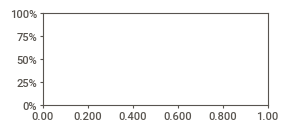

In [8]:
my_report = sv.compare_intra(df, df["sex"] == "Male", ["Male", "Female"])

In [9]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA report", explorative=True)
profile.to_file("ydata_report.html")        # standalone HTML


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 52.65it/s]


Feature: bill_length_mm                      |███▊      | [ 38%]   00:17 -> (00:00 left)

In [ ]:
profile.to_widgets()                        # Jupyter widgets


# 🛠️ Գործնական


https://www.kaggle.com/datasets/imoore/age-dataset

https://tjukanovt.github.io/notable-people

In [11]:
!pip install uv

  Using cached uv-0.7.19-py3-none-win_amd64.whl.metadata (12 kB)
Using cached uv-0.7.19-py3-none-win_amd64.whl (19.3 MB)


In [12]:
!uv pip install kagglehub[pandas-datasets]


Using Python 3.10.18 environment at: C:\Users\hayk_\.conda\envs\lectures
Resolved 16 packages in 922ms
Prepared 1 package in 194ms
Installed 1 package in 40ms
 + kagglehub==0.3.12


In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imoore/age-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hayk_\.cache\kagglehub\datasets\imoore\age-dataset\versions\1


In [ ]:
import os 

print(os.listdir(path))

path_csv = os.path.join(path, "AgeDataset-V1.csv") # Pathlib is better


Id                     Name  \
0   Q23        George Washington   
1   Q42            Douglas Adams   
2   Q91          Abraham Lincoln   
3  Q254  Wolfgang Amadeus Mozart   
4  Q255     Ludwig van Beethoven   

                                 Short description Gender  \
0   1st president of the United States (1732–1799)   Male   
1                      English writer and humorist   Male   
2  16th president of the United States (1809-1865)   Male   
3        Austrian composer of the Classical period   Male   
4           German classical and romantic composer   Male   

                                             Country  Occupation  Birth year  \
0  United States of America; Kingdom of Great Bri...  Politician        1732   
1                                     United Kingdom      Artist        1952   
2                           United States of America  Politician        1809   
3    Archduchy of Austria; Archbishopric of Salzburg      Artist        1756   
4                 Holy Roman Empire; Austrian Empire      Artist        1770   

   Death year Manner of death  Age of death  
0      1799.0  natural causes          67.0  
1      2001.0  natural causes          49.0  
2      1865.0        homicide          56.0  
3      1791.0             NaN          35.0  
4      1827.0             NaN          57.0

In [ ]:
import pandas as pd

df = pd.read_csv(path_csv)
df.head()

In [31]:
from pathlib import Path

new_path = Path("assets/people.csv")

df.to_csv(new_path, index=False)

In [32]:
df

Id                     Name  \
0              Q23        George Washington   
1              Q42            Douglas Adams   
2              Q91          Abraham Lincoln   
3             Q254  Wolfgang Amadeus Mozart   
4             Q255     Ludwig van Beethoven   
...            ...                      ...   
1223004  Q77247326    Marie-Fortunée Besson   
1223005  Q77249504              Ron Thorsen   
1223006  Q77249818       Diether Todenhagen   
1223007  Q77253909  Reginald Oswald Pearson   
1223008  Q77254864             Horst Lerche   

                                         Short description Gender  \
0           1st president of the United States (1732–1799)   Male   
1                              English writer and humorist   Male   
2          16th president of the United States (1809-1865)   Male   
3                Austrian composer of the Classical period   Male   
4                   German classical and romantic composer   Male   
...                                                    ...    ...   
1223004                            Frans model (1907-1996)    NaN   
1223005        xugador de baloncestu canadianu (1948–2004)    NaN   
1223006  German navy officer and world war II U-boat co...    NaN   
1223007  English artist, working in stained glass, prin...   Male   
1223008                                     German painter   Male   

                                                   Country  \
0        United States of America; Kingdom of Great Bri...   
1                                           United Kingdom   
2                                 United States of America   
3          Archduchy of Austria; Archbishopric of Salzburg   
4                       Holy Roman Empire; Austrian Empire   
...                                                    ...   
1223004                                             France   
1223005                   Canada; United States of America   
1223006                                            Germany   
1223007                                     United Kingdom   
1223008                                            Germany   

                 Occupation  Birth year  Death year Manner of death  \
0                Politician        1732      1799.0  natural causes   
1                    Artist        1952      2001.0  natural causes   
2                Politician        1809      1865.0        homicide   
3                    Artist        1756      1791.0             NaN   
4                    Artist        1770      1827.0             NaN   
...                     ...         ...         ...             ...   
1223004       Tailor; model        1907      1996.0             NaN   
1223005             Athlete        1948      2004.0             NaN   
1223006  Military personnel        1920      1944.0             NaN   
1223007              Artist        1887      1915.0             NaN   
1223008              Artist        1938      2017.0             NaN   

         Age of death  
0                67.0  
1                49.0  
2                56.0  
3                35.0  
4                57.0  
...               ...  
1223004          89.0  
1223005          56.0  
1223006          24.0  
1223007          28.0  
1223008          79.0  

[1223009 rows x 10 columns]

When not logged in:

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [34]:
df.describe()

Birth year    Death year  Age of death
count  1.223009e+06  1.223008e+06  1.223008e+06
mean   1.844972e+03  1.914246e+03  6.927406e+01
std    1.479390e+02  1.516898e+02  1.662938e+01
min   -2.700000e+03 -2.659000e+03  0.000000e+00
25%    1.828000e+03  1.895000e+03  6.000000e+01
50%    1.887000e+03  1.955000e+03  7.200000e+01
75%    1.918000e+03  1.994000e+03  8.100000e+01
max    2.016000e+03  2.021000e+03  1.690000e+02

In [35]:
df.value_counts("Occupation")

Occupation
Artist                                   281512
Politician                               195390
Athlete                                  110943
Researcher                                90709
Military personnel                        52911
                                          ...  
Zoology                                       1
Zoology; marine biology; biologist            1
École polytechnique                           1
Academic; literary scholar                    1
Wholesale; land owner; philanthropist         1
Name: count, Length: 9313, dtype: int64

In [36]:
df.groupby("Occupation")["Age of death"].describe()

count       mean  \
Occupation                                                             
1859                                                  1.0  47.000000   
Abbess                                               36.0  60.694444   
Abbess; business executive                            1.0  86.000000   
Abbess; christians jehovah’s witnesses                1.0  81.000000   
Abbé                                                  6.0  69.666667   
...                                                   ...        ...   
Zoology                                               1.0  44.000000   
Zoology; marine biology; biologist                    1.0  73.000000   
École polytechnique                                   1.0  72.000000   
Župan                                                 5.0  38.600000   
مجموعة الأنظمة منصة شليلة; serology; bacteriolo...    1.0  40.000000   

                                                          std   min   25%  \
Occupation                                                                  
1859                                                      NaN  47.0  47.0   
Abbess                                              16.924740  24.0  49.0   
Abbess; business executive                                NaN  86.0  86.0   
Abbess; christians jehovah’s witnesses                    NaN  81.0  81.0   
Abbé                                                16.070677  41.0  66.0   
...                                                       ...   ...   ...   
Zoology                                                   NaN  44.0  44.0   
Zoology; marine biology; biologist                        NaN  73.0  73.0   
École polytechnique                                       NaN  72.0  72.0   
Župan                                               27.061042  12.0  21.0   
مجموعة الأنظمة منصة شليلة; serology; bacteriolo...        NaN  40.0  40.0   

                                                     50%   75%   max  
Occupation                                                            
1859                                                47.0  47.0  47.0  
Abbess                                              63.0  73.0  90.0  
Abbess; business executive                          86.0  86.0  86.0  
Abbess; christians jehovah’s witnesses              81.0  81.0  81.0  
Abbé                                                72.5  79.0  87.0  
...                                                  ...   ...   ...  
Zoology                                             44.0  44.0  44.0  
Zoology; marine biology; biologist                  73.0  73.0  73.0  
École polytechnique                                 72.0  72.0  72.0  
Župan                                               32.0  47.0  81.0  
مجموعة الأنظمة منصة شليلة; serology; bacteriolo...  40.0  40.0  40.0  

[9313 rows x 8 columns]

In [38]:
df["Occupation"].nunique()

9313

In [39]:
df["Occupation"].value_counts()

Occupation
Artist                            281512
Politician                        195390
Athlete                           110943
Researcher                         90709
Military personnel                 52911
                                   ...  
Director; scout leader                 1
Salonnière; patron of the arts         1
Servant of god                         1
Cleric; coal miner                     1
Goldsmith; metalsmith                  1
Name: count, Length: 9313, dtype: int64

In [40]:
occup_counts = df["Occupation"].value_counts()

In [44]:
occupations_more_than_100 = occup_counts[occup_counts > 1_000].index

In [45]:
df = df[df["Occupation"].isin(occupations_more_than_100)]

In [50]:
age_by_occup = df.groupby("Occupation")["Age of death"].mean()
age_by_occup

Occupation
Architect             72.085306
Aristocrat            53.006540
Artist                69.725145
Astronomer            71.152301
Athlete               68.772460
Author                70.094754
Businessperson        74.153054
Engineer              72.156611
Entrepreneur          73.222146
Explorer              61.799302
Farmer                71.240991
Fencer                72.496454
Inventor              73.129545
Journalist            69.591239
Judge                 74.004850
Jurist                69.488372
Lawyer                71.231208
Librarian             73.437335
Merchant              68.316125
Military personnel    63.820056
Minister              69.176471
Novelist              71.452949
Pastor                68.870213
Philosopher           71.037957
Physician             70.683996
Pianist               71.754000
Police officer        64.403013
Politician            70.541558
Psychiatrist          73.231385
Psychologist          76.396378
Publisher             71.1789

In [52]:
age_by_occup.sort_values(ascending=True)

Occupation
Aristocrat            53.006540
Explorer              61.799302
Military personnel    63.820056
Police officer        64.403013
Merchant              68.316125
Athlete               68.772460
Pastor                68.870213
Minister              69.176471
Jurist                69.488372
Journalist            69.591239
Artist                69.725145
Religious figure      69.801273
Author                70.094754
Politician            70.541558
Physician             70.683996
Rower                 71.019317
Philosopher           71.037957
Astronomer            71.152301
Publisher             71.178990
Lawyer                71.231208
Farmer                71.240991
Novelist              71.452949
Rabbi                 71.741322
Pianist               71.754000
Trade unionist        71.768421
Surgeon               71.815642
Translator            72.046317
Architect             72.085306
Engineer              72.156611
Fencer                72.496454
Inventor              73.1295

In [54]:
df["Manner of death"].value_counts()

Manner of death
natural causes        29717
suicide                4647
accident               4217
homicide               3273
capital punishment     1813
                      ...  
rebellion                 1
Holocaust victim          1
unknown                   1
war; suicide              1
White Terror              1
Name: count, Length: 166, dtype: int64

In [ ]:
df_suicide = df[df["Manner of death"] == "suicide"]
df_suicide

Id                      Name  \
23            Q440          Salvador Allende   
131          Q1322     José Manuel Balmaceda   
189          Q2022             Cesare Pavese   
323          Q4616            Marilyn Monroe   
327          Q4673                 Paul Otto   
...            ...                       ...   
1212054  Q70834687              Karl Neumann   
1213739  Q73375287             Peter Kuranda   
1214539  Q75135015        Michael Benveniste   
1215398  Q75336010  George Dewey Sanford Jr.   
1217823  Q75694915           Gotthard Zimmer   

                                         Short description  Gender  \
23                     28th president of Chile (1908–1973)    Male   
131           Chilean politician and President (1840-1891)    Male   
189      Italian poet, novelist, literary critic, and t...    Male   
323        American actress, model, and singer (1926-1962)  Female   
327                         German film actor and director    Male   
...                                                    ...     ...   
1212054  politician and director of the Deutsche Zeiche...     NaN   
1213739                                Austrian journalist    Male   
1214539                American pornographic film director    Male   
1215398                               United States Marine    Male   
1217823     fotograaf uit Oostenrijk-Hongarije (1847-1886)     NaN   

                                              Country          Occupation  \
23                                              Chile          Politician   
131                                             Chile          Politician   
189                           Italy; Kingdom of Italy          Researcher   
323                          United States of America              Artist   
327      Nazi Germany; Weimar Republic; German Empire              Artist   
...                                               ...                 ...   
1212054                                  German Reich          Politician   
1213739                      Austria; Austria-Hungary          Journalist   
1214539                      United States of America              Artist   
1215398                      United States of America  Military personnel   
1217823                               Austria-Hungary              Artist   

         Birth year  Death year Manner of death  Age of death  
23             1908      1973.0         suicide          65.0  
131            1840      1891.0         suicide          51.0  
189            1908      1950.0         suicide          42.0  
323            1926      1962.0         suicide          36.0  
327            1878      1943.0         suicide          65.0  
...             ...         ...             ...           ...  
1212054        1900      1945.0         suicide          45.0  
1213739        1896      1938.0         suicide          42.0  
1214539        1946      1982.0         suicide          36.0  
1215398        1925      1994.0         suicide          69.0  
1217823        1847      1886.0         suicide          39.0  

[4647 rows x 10 columns]

In [60]:
suicide_counts_country = df_suicide["Country"].value_counts()
suicide_counts_country

Country
United States of America                           991
France                                             362
Germany                                            321
United Kingdom                                     152
Japan                                              141
                                                  ... 
Qing dynasty; Ming dynasty; Kingdom of Tungning      1
Spain; Peru                                          1
West Germany                                         1
Qing dynasty; China                                  1
United States of America; Russian Empire             1
Name: count, Length: 354, dtype: int64

In [61]:
country_counts = df["Country"].value_counts()
country_counts

Country
United States of America                                                                                                  135127
Germany                                                                                                                    78718
France                                                                                                                     65572
United Kingdom; United Kingdom of Great Britain and Ireland                                                                26642
Spain                                                                                                                      21930
                                                                                                                           ...  
Afghanistan; Austria-Hungary                                                                                                   1
Syria; Ottoman Empire; State of Damascus; Arab Kingdom of Syria; State of Syria; Syrian R

In [65]:
suicide = pd.merge(suicide_counts_country, country_counts, 
                   how="left", on="Country",
                   suffixes=("_suicide", "_overall"))
suicide

count_suicide  count_overall
Country                                                                      
United States of America                                   991         135127
France                                                     362          65572
Germany                                                    321          78718
United Kingdom                                             152          19127
Japan                                                      141          13209
...                                                        ...            ...
Qing dynasty; Ming dynasty; Kingdom of Tungning              1              1
Spain; Peru                                                  1             23
West Germany                                                 1             21
Qing dynasty; China                                          1             10
United States of America; Russian Empire                     1            151

[354 rows x 2 columns]

In [66]:
suicide["suicide_over_total"] = suicide["count_suicide"] / suicide["count_overall"]
suicide

count_suicide  count_overall  \
Country                                                                         
United States of America                                   991         135127   
France                                                     362          65572   
Germany                                                    321          78718   
United Kingdom                                             152          19127   
Japan                                                      141          13209   
...                                                        ...            ...   
Qing dynasty; Ming dynasty; Kingdom of Tungning              1              1   
Spain; Peru                                                  1             23   
West Germany                                                 1             21   
Qing dynasty; China                                          1             10   
United States of America; Russian Empire                     1            151   

                                                 suicide_over_total  
Country                                                              
United States of America                                   0.007334  
France                                                     0.005521  
Germany                                                    0.004078  
United Kingdom                                             0.007947  
Japan                                                      0.010675  
...                                                             ...  
Qing dynasty; Ming dynasty; Kingdom of Tungning            1.000000  
Spain; Peru                                                0.043478  
West Germany                                               0.047619  
Qing dynasty; China                                        0.100000  
United States of America; Russian Empire                   0.006623  

[354 rows x 3 columns]

In [69]:
suicide["suicide_per_1k"] = suicide["suicide_over_total"] * 1000

In [76]:
suicide_sorted = suicide.sort_values(by="suicide_per_1k", ascending=True)
suicide_sorted

count_suicide  \
Country                                                             
Spain                                                          31   
Denmark                                                        16   
Kingdom of England                                              7   
Grand Duchy of Finland                                          1   
India; British Raj                                              5   
...                                                           ...   
Northern Ireland; Ireland                                       1   
People's Republic of Bulgaria                                   1   
United States of America; French Third Republic...              1   
Japan; China                                                    1   
Nazi Germany; Kingdom of Romania; West Germany                  1   

                                                    count_overall  \
Country                                                             
Spain                                                       21930   
Denmark                                                      9187   
Kingdom of England                                           3920   
Grand Duchy of Finland                                        549   
India; British Raj                                           2642   
...                                                           ...   
Northern Ireland; Ireland                                       1   
People's Republic of Bulgaria                                   1   
United States of America; French Third Republic...              1   
Japan; China                                                    1   
Nazi Germany; Kingdom of Romania; West Germany                  1   

                                                    suicide_over_total  \
Country                                                                  
Spain                                                         0.001414   
Denmark                                                       0.001742   
Kingdom of England                                            0.001786   
Grand Duchy of Finland                                        0.001821   
India; British Raj                                            0.001893   
...                                                                ...   
Northern Ireland; Ireland                                     1.000000   
People's Republic of Bulgaria                                 1.000000   
United States of America; French Third Republic...            1.000000   
Japan; China                                                  1.000000   
Nazi Germany; Kingdom of Romania; West Germany                1.000000   

                                                    suicide_per_1k  
Country                                                             
Spain                                                     1.413589  
Denmark                                                   1.741591  
Kingdom of England                                        1.785714  
Grand Duchy of Finland                                    1.821494  
India; British Raj                                        1.892506  
...                                                            ...  
Northern Ireland; Ireland                              1000.000000  
People's Republic of Bulgaria                          1000.000000  
United States of America; French Third Republic...     1000.000000  
Japan; China                                           1000.000000  
Nazi Germany; Kingdom of Romania; West Germany         1000.000000  

[354 rows x 4 columns]

<Axes: xlabel='Country'>

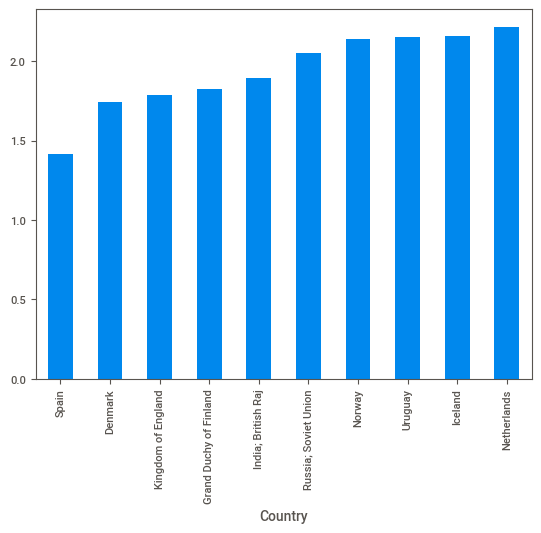

In [79]:
suicide_sorted.head(10)["suicide_per_1k"].plot(kind="bar")

<Axes: xlabel='Country'>

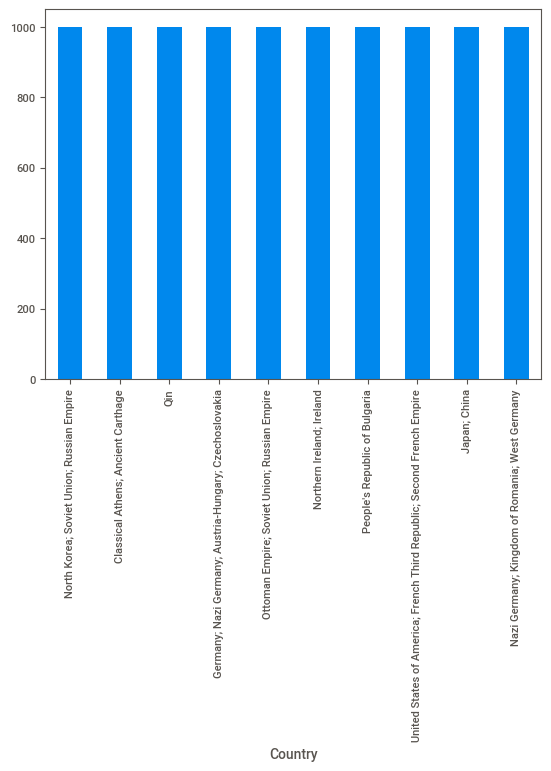

In [80]:
suicide_sorted.tail(10)["suicide_per_1k"].plot(kind="bar")

In [81]:
suicide_sorted.tail(10)

count_suicide  \
Country                                                             
North Korea; Soviet Union; Russian Empire                       1   
Classical Athens; Ancient Carthage                              1   
Qin                                                             1   
Germany; Nazi Germany; Austria-Hungary; Czechos...              1   
Ottoman Empire; Soviet Union; Russian Empire                    1   
Northern Ireland; Ireland                                       1   
People's Republic of Bulgaria                                   1   
United States of America; French Third Republic...              1   
Japan; China                                                    1   
Nazi Germany; Kingdom of Romania; West Germany                  1   

                                                    count_overall  \
Country                                                             
North Korea; Soviet Union; Russian Empire                       1   
Classical Athens; Ancient Carthage                              1   
Qin                                                             1   
Germany; Nazi Germany; Austria-Hungary; Czechos...              1   
Ottoman Empire; Soviet Union; Russian Empire                    1   
Northern Ireland; Ireland                                       1   
People's Republic of Bulgaria                                   1   
United States of America; French Third Republic...              1   
Japan; China                                                    1   
Nazi Germany; Kingdom of Romania; West Germany                  1   

                                                    suicide_over_total  \
Country                                                                  
North Korea; Soviet Union; Russian Empire                          1.0   
Classical Athens; Ancient Carthage                                 1.0   
Qin                                                                1.0   
Germany; Nazi Germany; Austria-Hungary; Czechos...                 1.0   
Ottoman Empire; Soviet Union; Russian Empire                       1.0   
Northern Ireland; Ireland                                          1.0   
People's Republic of Bulgaria                                      1.0   
United States of America; French Third Republic...                 1.0   
Japan; China                                                       1.0   
Nazi Germany; Kingdom of Romania; West Germany                     1.0   

                                                    suicide_per_1k  
Country                                                             
North Korea; Soviet Union; Russian Empire                   1000.0  
Classical Athens; Ancient Carthage                          1000.0  
Qin                                                         1000.0  
Germany; Nazi Germany; Austria-Hungary; Czechos...          1000.0  
Ottoman Empire; Soviet Union; Russian Empire                1000.0  
Northern Ireland; Ireland                                   1000.0  
People's Republic of Bulgaria                               1000.0  
United States of America; French Third Republic...          1000.0  
Japan; China                                                1000.0  
Nazi Germany; Kingdom of Romania; West Germany              1000.0

<Axes: xlabel='Country'>

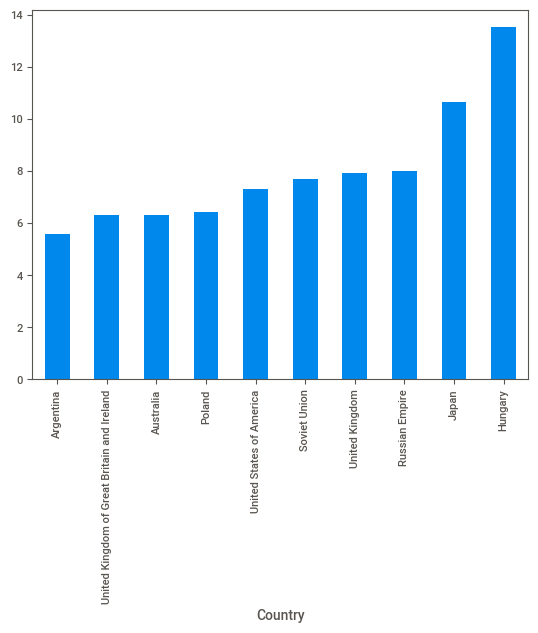

In [86]:
suicide_sorted[suicide_sorted["count_overall"] > 5_000]["suicide_per_1k"].tail(10).plot(kind="bar")

In [91]:
df.isna().sum()

Id                        0
Name                      0
Short description      8421
Gender                87633
Country              182030
Occupation                0
Birth year                0
Death year                0
Manner of death      881641
Age of death              0
dtype: int64

In [92]:
df["Gender"].value_counts()

Gender
Male                                              762780
Female                                             75634
Transgender Female                                    47
Transgender Male                                      24
Eunuch; Male                                          16
Female; Male                                           6
Intersex                                               5
Transgender Male; Female                               3
Non-Binary                                             2
Transgender Person; Intersex; Transgender Male         1
Intersex; Male                                         1
Transgender Female; Female                             1
Transgender Female; Male                               1
Intersex; Transgender Male                             1
Transgender Male; Male                                 1
Female; Female                                         1
Name: count, dtype: int64

In [95]:
df.query("Gender == 'Non-Binary'")

Id            Name                Short description  \
39998     Q219634    Claude Cahun        French artist (1894-1954)   
754386  Q13562059  Maxine Feldman  lesbian and non-binary musician   

            Gender                   Country Occupation  Birth year  \
39998   Non-Binary                    France     Artist        1894   
754386  Non-Binary  United States of America     Artist        1945   

        Death year Manner of death  Age of death  
39998       1954.0             NaN          60.0  
754386      2007.0             NaN          62.0

In [96]:
df.columns

Index(['Id', 'Name', 'Short description', 'Gender', 'Country', 'Occupation',
       'Birth year', 'Death year', 'Manner of death', 'Age of death'],
      dtype='object')

In [98]:
df.groupby("Gender")["Birth year"].max().sort_values()

Gender
Eunuch; Male                                      1451
Intersex; Male                                    1763
Transgender Male; Male                            1869
Female; Female                                    1884
Transgender Person; Intersex; Transgender Male    1885
Intersex; Transgender Male                        1912
Transgender Male; Female                          1913
Intersex                                          1926
Non-Binary                                        1945
Transgender Female; Male                          1947
Female; Male                                      1949
Transgender Female; Female                        1949
Transgender Male                                  1986
Transgender Female                                1991
Male                                              2002
Female                                            2002
Name: Birth year, dtype: int64

In [99]:
df = df[df["Gender"].isin(["Male", "Female"])]

In [102]:
def get_male_percentage(series):
    male = series[series == "Male"]
    
    return len(male) / len(series) * 100
    
    

In [107]:
gender_occup = df.groupby("Occupation")["Gender"].apply(get_male_percentage).sort_values()
gender_occup

Occupation
Novelist              59.512938
Aristocrat            62.485844
Pianist               65.903710
Librarian             78.177458
Psychologist          79.160187
Translator            79.566695
Artist                82.175696
Teacher               86.325616
Author                87.422553
Trade unionist        87.559809
Fencer                87.588652
Journalist            88.011717
Psychiatrist          91.073039
Astronomer            91.732566
Physician             91.991983
Researcher            92.046247
Lawyer                93.986948
Philosopher           94.502728
Businessperson        95.159497
Farmer                95.341098
Publisher             95.347826
Politician            95.615544
Police officer        95.829095
Entrepreneur          96.634967
Architect             96.703996
Athlete               96.728335
Explorer              97.033159
Judge                 97.115385
Minister              97.129187
Inventor              97.274979
Religious figure      97.4390

<Axes: xlabel='Occupation'>

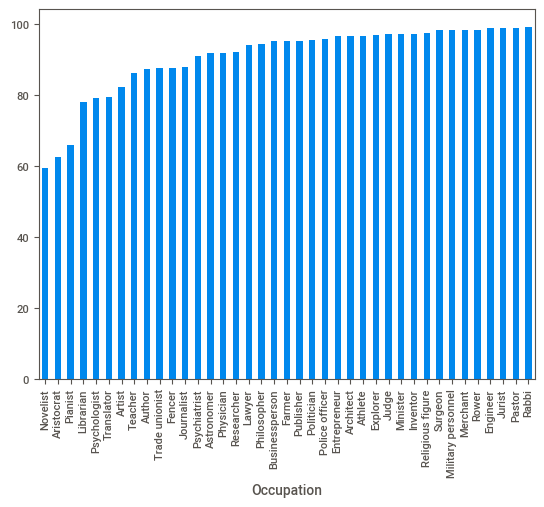

In [108]:
gender_occup.plot(kind="bar")

In [123]:
def is_armenian(text):
    keywords = ["armenian", "armenia"]
    return any([k in text.lower() for k in keywords])

In [124]:
df["Armenian"] = df["Short description"].apply(is_armenian)
df

AttributeError: 'float' object has no attribute 'lower'

In [125]:
df["Armenian"] = df["Short description"].fillna("na").apply(is_armenian)


C:\Users\hayk_\AppData\Local\Temp\ipykernel_24800\4022290967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Armenian"] = df["Short description"].fillna("na").apply(is_armenian)


In [122]:
df[df.Armenian]

Id                          Name  \
180          Q1785              Charles Aznavour   
311          Q4452             Thomas of Metsoph   
354          Q4924  Isabella I, Queen of Armenia   
3462        Q51472              Rouben Mamoulian   
3807        Q55394                Henri Verneuil   
...            ...                           ...   
1158947  Q58030786                  Marie Balian   
1161788  Q59394760                Robert Kamoyan   
1166304  Q59657412             Giuseppe Arachial   
1191627  Q63226473             Boris Meliksetyan   
1198505  Q64734343                Pierre Tilkian   

                                   Short description  Gender  \
180              Armenian-French singer and diplomat    Male   
311                   Armenian cleric and chronicler    Male   
354                queen regnant of Cilician Armenia  Female   
3462     Armenian American film and theatre director    Male   
3807        French-Armenian playwright and filmmaker    Male   
...                                              ...     ...   
1158947                      Armenian ceramic artist  Female   
1161788                    Armenian director, artist    Male   
1166304           Armenian Catholic bishop of Angora    Male   
1191627                           Armenian geologist    Male   
1198505                     Armenian Catholic bishop    Male   

                                          Country        Occupation  \
180                               France; Armenia            Artist   
311                                           NaN        Researcher   
354                   Armenian Kingdom of Cilicia        Politician   
3462     United States of America; Russian Empire            Artist   
3807                                       France            Artist   
...                                           ...               ...   
1158947                                    Israel            Artist   
1161788                     Armenia; Soviet Union            Artist   
1166304                            Ottoman Empire  Religious figure   
1191627                     Armenia; Soviet Union        Researcher   
1198505                                       NaN  Religious figure   

         Birth year  Death year Manner of death  Age of death  Armenian  
180            1924      2018.0             NaN          94.0      True  
311            1378      1446.0             NaN          68.0      True  
354            1216      1252.0             NaN          36.0      True  
3462           1897      1987.0             NaN          90.0      True  
3807           1920      2002.0             NaN          82.0      True  
...             ...         ...             ...           ...       ...  
1158947        1925      2017.0             NaN          92.0      True  
1161788        1937      2014.0             NaN          77.0      True  
1166304        1811      1876.0             NaN          65.0      True  
1191627        1928      1992.0             NaN          64.0      True  
1198505        1809      1885.0             NaN          76.0      True  

[538 rows x 11 columns]

In [118]:
df[df["Country"] == "Armenia"]

Id               Name  \
43970      Q266968   Gurgen Margaryan   
45653      Q278864   Andranik Ozanian   
54084      Q336104    Jerry Tarkanian   
71000      Q471374       Karen Asrian   
79459      Q544093  Genrikh Kasparyan   
...            ...                ...   
1003702  Q24048886     Robert Abajyan   
1025037  Q27349753     Artur Sargsyan   
1034887  Q28114502    Emma Khanzadyan   
1046490  Q29033966   Eduard Edigaryan   
1084025  Q47009214    Pavel Chobanyan   

                                         Short description  Gender  Country  \
43970                                     Armenian soldier    Male  Armenia   
45653    Armenian politician and military personnel (18...    Male  Armenia   
54084                            American basketball coach    Male  Armenia   
71000                                Armenian chess player    Male  Armenia   
79459                                Armenian chess player    Male  Armenia   
...                                                    ...     ...      ...   
1003702          Armenian military person, Hero of Artsakh    Male  Armenia   
1025037                                  Armenian sculptor    Male  Armenia   
1034887                  Armenian historian, archaeologist  Female  Armenia   
1046490                                   Armenian painter    Male  Armenia   
1084025                               Armenian orientalist    Male  Armenia   

                 Occupation  Birth year  Death year Manner of death  \
43970    Military personnel        1978      2004.0        homicide   
45653            Politician        1865      1927.0             NaN   
54084               Athlete        1930      2015.0             NaN   
71000               Athlete        1980      2008.0  natural causes   
79459               Athlete        1910      1995.0             NaN   
...                     ...         ...         ...             ...   
1003702  Military personnel        1996      2016.0         suicide   
1025037              Artist        1968      2017.0             NaN   
1034887          Researcher        1922      2007.0             NaN   
1046490              Artist        1943      2019.0             NaN   
1084025          Researcher        1948      2017.0             NaN   

         Age of death  Armenian  
43970            26.0     False  
45653            62.0     False  
54084            85.0     False  
71000            28.0     False  
79459            85.0     False  
...               ...       ...  
1003702          20.0     False  
1025037          49.0     False  
1034887          85.0     False  
1046490          76.0     False  
1084025          69.0     False  

[121 rows x 11 columns]

In [129]:
arm = df[df["Country"].fillna("na").str.contains("Armenia")]

In [131]:
arm["num_countries"] = arm["Country"].str.split(";").apply(len)
arm

C:\Users\hayk_\AppData\Local\Temp\ipykernel_24800\2434009080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm["num_countries"] = arm["Country"].str.split(";").apply(len)


Id                          Name  \
180          Q1785              Charles Aznavour   
354          Q4924  Isabella I, Queen of Armenia   
3201        Q48112                Ivan Bagramyan   
4983        Q61130                  Luigi Colani   
5560        Q62316             Robert Sahakyants   
...            ...                           ...   
1086289  Q47457007             Garnik Karapetyan   
1161788  Q59394760                Robert Kamoyan   
1182207  Q62024298                 Diana Oucleba   
1191627  Q63226473             Boris Meliksetyan   
1206411  Q66132386              Albert Ghazaryan   

                                        Short description  Gender  \
180                   Armenian-French singer and diplomat    Male   
354                     queen regnant of Cilician Armenia  Female   
3201              Marshal of the Soviet Union (1897-1982)    Male   
4983      German industrial designer and design professor    Male   
5560                                             animator    Male   
...                                                   ...     ...   
1086289  Armenian scientist and mathematician (1958–2018)    Male   
1161788                         Armenian director, artist    Male   
1182207                          Georgian poetess, artist  Female   
1191627                                Armenian geologist    Male   
1206411                           athlete, coach, referee    Male   

                                                   Country  Occupation  \
180                                        France; Armenia      Artist   
354                            Armenian Kingdom of Cilicia  Politician   
3201     Soviet Union; Russian Empire; First Republic o...  Politician   
4983                                      Germany; Armenia     Teacher   
5560                                 Armenia; Soviet Union      Artist   
...                                                    ...         ...   
1086289                              Armenia; Soviet Union  Researcher   
1161788                              Armenia; Soviet Union      Artist   
1182207              Armenia; Soviet Union; Russian Empire      Artist   
1191627                              Armenia; Soviet Union  Researcher   
1206411                              Armenia; Soviet Union     Athlete   

         Birth year  Death year Manner of death  Age of death  Armenian  \
180            1924      2018.0             NaN          94.0      True   
354            1216      1252.0             NaN          36.0      True   
3201           1897      1982.0             NaN          85.0     False   
4983           1928      2019.0             NaN          91.0     False   
5560           1950      2009.0             NaN          59.0     False   
...             ...         ...             ...           ...       ...   
1086289        1958      2018.0             NaN          60.0      True   
1161788        1937      2014.0             NaN          77.0      True   
1182207        1910      2001.0             NaN          91.0     False   
1191627        1928      1992.0             NaN          64.0      True   
1206411        1935      2020.0             NaN          85.0     False   

         num_countries  
180                  2  
354                  1  
3201                 3  
4983                 2  
5560                 2  
...                ...  
1086289              2  
1161788              2  
1182207              3  
1191627              2  
1206411              2  

[301 rows x 12 columns]

In [132]:
arm.sort_values(by="num_countries", ascending=False)

Id                          Name  \
231807   Q2047004                Suren Yeremyan   
71047     Q471740          Armen Dzhigarkhanyan   
100991    Q738092               Pavel Lisitsian   
370403   Q4071165              Tinatin Asatiani   
370366   Q4070512          Varazdat Harutyunyan   
...           ...                           ...   
932345  Q20509556               Maria Petrosyan   
932348  Q20509639                 Aida Boyajyan   
932353  Q20509808                  Henrik Sevan   
43970     Q266968              Gurgen Margaryan   
354         Q4924  Isabella I, Queen of Armenia   

                                   Short description  Gender  \
231807                            Armenian historian    Male   
71047                Armenian, Soviet, Russian actor    Male   
100991                                Russian singer    Male   
370403                            Georgian physicist  Female   
370366                            Armenian architect    Male   
...                                              ...     ...   
932345                          Armenian philosopher  Female   
932348                               Armenian artist  Female   
932353  Armenian children's writer, translator, poet    Male   
43970                               Armenian soldier    Male   
354                queen regnant of Cilician Armenia  Female   

                                                  Country          Occupation  \
231807  Armenia; Soviet Union; Russian Empire; Russian...          Researcher   
71047   United States of America; Russia; Armenia; Sov...              Artist   
100991      Russia; Armenia; Soviet Union; Russian Empire              Artist   
370403  Armenia; Soviet Union; Democratic Republic of ...          Researcher   
370366  Armenia; Ottoman Empire; Soviet Union; Russian...          Researcher   
...                                                   ...                 ...   
932345                                            Armenia         Philosopher   
932348                                            Armenia              Artist   
932353                                            Armenia              Artist   
43970                                             Armenia  Military personnel   
354                           Armenian Kingdom of Cilicia          Politician   

        Birth year  Death year Manner of death  Age of death  Armenian  \
231807        1908      1992.0             NaN          84.0      True   
71047         1935      2020.0             NaN          85.0      True   
100991        1911      2004.0             NaN          93.0     False   
370403        1918      2011.0             NaN          93.0     False   
370366        1909      2008.0             NaN          99.0      True   
...            ...         ...             ...           ...       ...   
932345        1911      1971.0             NaN          60.0      True   
932348        1932      2019.0             NaN          87.0      True   
932353        1925      2008.0             NaN          83.0      True   
43970         1978      2004.0        homicide          26.0      True   
354           1216      1252.0             NaN          36.0      True   

        num_countries  
231807              9  
71047               4  
100991              4  
370403              4  
370366              4  
...               ...  
932345              1  
932348              1  
932353              1  
43970               1  
354                 1  

[301 rows x 12 columns]

<Axes: ylabel='Frequency'>

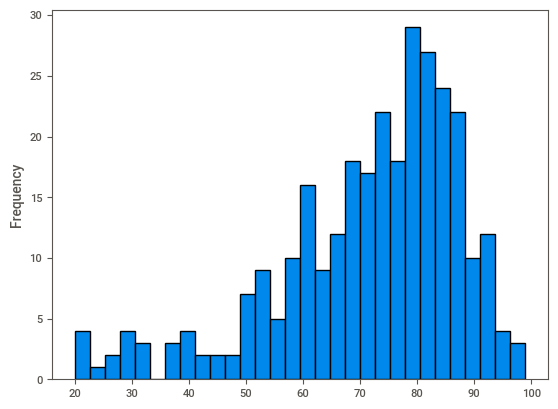

In [134]:
arm["Age of death"].plot(kind="hist", bins=30, edgecolor="black")

<Axes: xlabel='Occupation'>

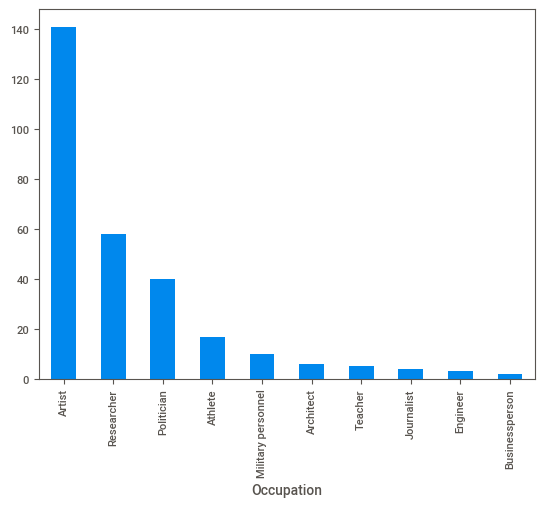

In [135]:
arm["Occupation"].value_counts().head(10).plot(kind="bar")

In [137]:
arm[arm["Occupation"] == "Teacher"]

Id                  Name  \
4983       Q61130          Luigi Colani   
284037   Q2947568    Gabriel Guevrekian   
543697   Q6221011        John Basmajian   
822609  Q16369110      Ashot Abrahamyan   
822764  Q16392864  Margarit Harutyunyan   

                                      Short description  Gender  \
4983    German industrial designer and design professor    Male   
284037                                Turkish architect    Male   
543697                  Canadian academic and scientist    Male   
822609                              linguista sovietico    Male   
822764                  Armenian musicologist, educator  Female   

                                           Country Occupation  Birth year  \
4983                              Germany; Armenia    Teacher        1928   
284037  United States of America; Austria; Armenia    Teacher        1900   
543697                                     Armenia    Teacher        1921   
822609          Armenian Soviet Socialist Republic    Teacher        1918   
822764                                     Armenia    Teacher        1921   

        Death year Manner of death  Age of death  Armenian  num_countries  
4983        2019.0             NaN          91.0     False              2  
284037      1970.0             NaN          70.0     False              3  
543697      2008.0             NaN          87.0     False              1  
822609      1985.0             NaN          67.0     False              1  
822764      1997.0             NaN          76.0      True              1

In [144]:
print(pd.pivot_table(arm, index="Occupation", columns="Gender", values="Age of death", 
               aggfunc=["mean", "count"]))#.columns)


                         mean             count       
Gender                 Female       Male Female   Male
Occupation                                            
Architect           82.500000  85.000000    2.0    4.0
Artist              77.969697  74.555556   33.0  108.0
Astronomer          88.000000        NaN    1.0    NaN
Athlete                   NaN  65.470588    NaN   17.0
Businessperson            NaN  88.000000    NaN    2.0
Engineer                  NaN  79.000000    NaN    3.0
Entrepreneur              NaN  80.000000    NaN    2.0
Inventor                  NaN  87.000000    NaN    2.0
Journalist                NaN  73.000000    NaN    4.0
Jurist                    NaN  65.500000    NaN    2.0
Lawyer                    NaN  88.000000    NaN    1.0
Military personnel        NaN  39.800000    NaN   10.0
Philosopher         60.000000        NaN    1.0    NaN
Physician           85.000000  86.000000    1.0    1.0
Politician          53.750000  60.444444    4.0   36.0
Religious 

In [148]:
print(pd.pivot_table(arm, index="Occupation", columns="Gender", values="Age of death", 
               aggfunc=["mean", "count"]).columns)#sort_values("('count',   'Male')"))#.columns)


MultiIndex([( 'mean', 'Female'),
            ( 'mean',   'Male'),
            ('count', 'Female'),
            ('count',   'Male')],
           names=[None, 'Gender'])


# 🏡Տնային
Վերցնել ցանկցած դատասեթ ու փորփրել։ 

Կարող եք դատան վերցնել [Kaggle](https://www.kaggle.com/datasets?fileType=csv)-ից։ Կամ եթե հայկական եք ուզում՝ [Armstat](https://armstat.am/am/)-ից

# 🎲 22 (04)
- ▶️[Aree Educational Center](https://www.youtube.com/watch?v=jvFGHzLPSO0)
- ▶️[Random link](https://www.instagram.com/reel/DKr7Sd5RnqI/?utm_source=ig_web_copy_link&igsh=MzRlODBiNWFlZA==)
- 🇦🇲🎶[Կատուներ (Նորևան)](https://www.youtube.com/watch?v=ZQAfoIvC6sY)
- 🌐🎶[Don McLean (Vincent)](https://www.youtube.com/watch?v=oxHnRfhDmrk)
- 🤌[Կարգին](https://www.youtube.com/watch?v=oYbSr-GJ2Zk)